In [1]:
import stormpy 
from mce_irl_pomdps import parser_pomdp
from mce_irl_pomdps import irl_pomdp_solver as irl_solver
import numpy as np

In [14]:
def correct_policy(pol):
    """ Stupid Remove numerical issues from a synthesized policy (close to zero negative values)
    """
    res_pol = dict()
    for o, actDict in pol.items():
        res_pol[o] = dict()
        neg_val = dict()
        sum_val = 0
        for a, val in actDict.items():
            if val < 0:
                res_pol[o][a] = 0
            else:
                res_pol[o][a] = val
            sum_val += res_pol[o][a]
        diff_val = 1 - sum_val
        for a, val in actDict.items():
            if val > 0:
                res_pol[o][a] += diff_val
                diff_val = 0
    return res_pol

In [2]:
# stormpy.pomdp.PomdpMemoryPattern.selective_counter
# stormpy.pomdp.PomdpMemoryPattern.fixed_counter
# stormpy.pomdp.PomdpMemoryPattern.selective_ring
# stormpy.pomdp.PomdpMemoryPattern.fixed_ring
# stormpy.pomdp.PomdpMemoryPattern.full
# stormpy.pomdp.PomdpMemoryPattern.trivial
np.random.seed(201)
pomdp_r_1 = parser_pomdp.PrismModel("rocksample_4_4_2.prism", 
                                    counter_type=stormpy.pomdp.PomdpMemoryPattern.fixed_ring, 
                                    memory_len=1, export=True)
pomdp_r_4 = parser_pomdp.PrismModel("rocksample_4_4_2.prism", 
                                    counter_type=stormpy.pomdp.PomdpMemoryPattern.fixed_ring, 
                                    memory_len=4, export=True)
pomdp_r_6 = parser_pomdp.PrismModel("rocksample_4_4_2.prism", 
                                    counter_type=stormpy.pomdp.PomdpMemoryPattern.fixed_counter, 
                                    memory_len=10, export=True)

In [ ]:
print(pomdp_r_6.pomdp)

In [3]:
# Options for the solver
options_opt = irl_solver.OptOptions(mu=1e1, mu_spec=1e4, maxiter=50, maxiter_weight=50,
                      graph_epsilon=0, discount=0.999, verbose=True, verbose_solver=False)
# True reward in the POMDP environment
weight = { 'sense_time' : 2, 'total_time' : 1, 'finish_grock' : 100, 'bad_rock' : 5, 'finish' : 10}

In [4]:
# Build the instance without side information
pomdp_r_1._has_sideinfo = False # Ignore the side information for the first part
irlPb_1 = irl_solver.IRLSolver(pomdp_r_1, init_trust_region=1.1, max_trust_region=3, options=options_opt)
pol_val_grb_1mem = irlPb_1.from_reward_to_policy_via_scp(weight)

Academic license - for non-commercial use only - expires 2021-07-11
Using license file /home/fdjeumou/gurobi.lic
Initialize Linear subproblem to be solved at iteration k
[Time used to build the full Model : 0.1774730682373047]
[Initialization] Reward attained -13.055679153899584, Spec SAT : 0
[Initialization] Number of steps : 0
[Iter 0]: Reward attained -0.7770421876453448, Spec SAT : 0, Trust region : 1.125
[Iter 0]: Update time : 0.019280672073364258s, Checking time : 0.022581815719604492s, Solve time: 0.7563316822052002s
[Iter 1]: Reward attained 13.167979523083362, Spec SAT : 0, Trust region : 1.15625
[Iter 1]: Update time : 0.04283452033996582s, Checking time : 0.03430318832397461s, Solve time: 0.9314379692077637s
[Iter 2]: Reward attained 28.0360185866056, Spec SAT : 0, Trust region : 1.1953125
[Iter 2]: Update time : 0.06307506561279297s, Checking time : 0.04407095909118652s, Solve time: 1.072549819946289s
[Iter 3]: Reward attained 42.82369194170762, Spec SAT : 0, Trust region 

In [5]:
pomdp_r_4._has_sideinfo = False # Ignore the side information for the first part
irlPb_4 = irl_solver.IRLSolver(pomdp_r_4, init_trust_region=1.1, max_trust_region=3, options=options_opt)
pol_val_grb_4mem = irlPb_4.from_reward_to_policy_via_scp(weight)

Initialize Linear subproblem to be solved at iteration k
[Time used to build the full Model : 0.428769588470459]
[Initialization] Reward attained -13.055679153899995, Spec SAT : 0
[Initialization] Number of steps : 0
[Iter 0]: Reward attained -0.47727043844275935, Spec SAT : 0, Trust region : 1.125
[Iter 0]: Update time : 0.13984155654907227s, Checking time : 0.051970720291137695s, Solve time: 2.381798028945923s
[Iter 1]: Reward attained 13.175160217346058, Spec SAT : 0, Trust region : 1.15625
[Iter 1]: Update time : 0.2129220962524414s, Checking time : 0.09624862670898438s, Solve time: 6.209338665008545s
[Iter 2]: Reward attained 27.740993917932688, Spec SAT : 0, Trust region : 1.1953125
[Iter 2]: Update time : 0.28049278259277344s, Checking time : 0.1455676555633545s, Solve time: 11.32305359840393s
[Iter 3]: Reward attained 42.57851262747273, Spec SAT : 0, Trust region : 1.244140625
[Iter 3]: Update time : 0.355863094329834s, Checking time : 0.19016575813293457s, Solve time: 18.21958

In [6]:
# options_opt = irl_solver.OptOptions(mu=1e1, mu_spec=1e4, maxiter=50, maxiter_weight=50,
#                       graph_epsilon=0, discount=0.999, verbose=True, verbose_solver=True)
pomdp_r_6._has_sideinfo = False # Ignore the side information for the first part
irlPb_6 = irl_solver.IRLSolver(pomdp_r_6, init_trust_region=1.1, max_trust_region=3, options=options_opt)
pol_val_grb_6mem = irlPb_6.from_reward_to_policy_via_scp(weight)

Initialize Linear subproblem to be solved at iteration k
[Time used to build the full Model : 0.792191743850708]
[Initialization] Reward attained -13.055679153900455, Spec SAT : 0
[Initialization] Number of steps : 0
[Iter 0]: Reward attained -2.141246136891664, Spec SAT : 0, Trust region : 1.125
[Iter 0]: Update time : 0.16327929496765137s, Checking time : 0.07648777961730957s, Solve time: 4.5253071784973145s
[Iter 1]: Reward attained 10.449293915962652, Spec SAT : 0, Trust region : 1.15625
[Iter 1]: Update time : 0.2883889675140381s, Checking time : 0.1460249423980713s, Solve time: 13.068256139755249s
[Iter 2]: Reward attained 25.27372342140733, Spec SAT : 0, Trust region : 1.1953125
[Iter 2]: Update time : 0.40772318840026855s, Checking time : 0.21541523933410645s, Solve time: 18.88767099380493s
[Iter 3]: Reward attained 41.395673180509014, Spec SAT : 0, Trust region : 1.244140625
[Iter 3]: Update time : 0.5281801223754883s, Checking time : 0.2848474979400635s, Solve time: 30.504943

In [7]:
pol_val_mdp = irlPb_1.from_reward_to_optimal_policy_mdp_lp(weight, gamma=options_opt.discount)

Initialize Linear subproblem to be solved at iteration k
[Time used to build the full Model : 0.07061290740966797]
[Total solving time : 0.01343846321105957]
[Optimal expected reward : 104.28754735942701]


In [22]:
# Generate a bunch of trajectories
np.random.seed(501)
nb_run = 300
max_iter_per_run = 200
_, rewDataMdp = pomdp_r_1.simulate_policy(pol_val_mdp, weight, nb_run, max_iter_per_run, 
                        obs_based=False, stop_at_accepting_state=False)
_, rewDataPomdp_1mem = pomdp_r_1.simulate_policy(pol_val_grb_1mem, weight, nb_run, max_iter_per_run, 
                        obs_based=True, stop_at_accepting_state=False)
_, rewDataPomdp_4mem = pomdp_r_4.simulate_policy(pol_val_grb_4mem, weight, nb_run, max_iter_per_run, 
                        obs_based=True, stop_at_accepting_state=False)
_, rewDataPomdp_10mem = pomdp_r_6.simulate_policy(correct_policy(pol_val_grb_6mem), weight, nb_run, max_iter_per_run, 
                        obs_based=True, stop_at_accepting_state=False)

In [23]:
# discountArray = np.array([options_opt.discount**i for i in range(max_iter_per_run)])
discountArray = np.array([1 for i in range(max_iter_per_run)])

In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_pol(rewData, cData=-1, color='red', label='dum', alpha=0.5, plot_std=False, linestyle='solid'):
    rewData = np.array(rewData) * discountArray
    arr_rewData = np.cumsum(rewData, axis=1)
    mean_rew = np.mean(arr_rewData, axis = 0)
    min_rew = np.min(arr_rewData, axis=0)
    max_rew = np.max(arr_rewData, axis=0)
    std_rew = np.std(arr_rewData, axis=0)
    axis_x = np.array([i for i in range(mean_rew.shape[0])])
#     print(mean_rew.shape, cData)
    plt.plot(axis_x[:cData], mean_rew[:cData], color=color, label=label, linestyle=linestyle)
    if plot_std:
        plt.fill_between(axis_x[:cData], np.maximum(min_rew,mean_rew-std_rew)[:cData], np.minimum(max_rew,mean_rew+std_rew)[:cData], color=color, alpha=alpha)

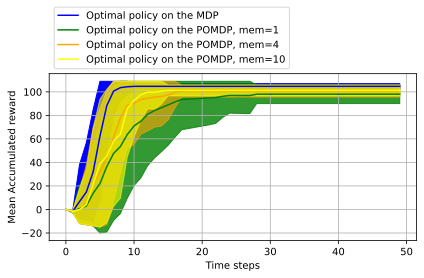

In [26]:
nData = 50
plt.figure()
plot_pol(rewDataMdp, nData, color='blue', label='Optimal policy on the MDP', alpha=1, plot_std=True)
plot_pol(rewDataPomdp_1mem, nData, color='green', label='Optimal policy on the POMDP, mem=1', alpha=0.8, plot_std=True)
# plot_pol(pol_val_scp, color='red', nb_run=nb_run, nb_iter_run=max_iter_per_run, is_obs=True)
plot_pol(rewDataPomdp_4mem, nData, color='orange', label='Optimal policy on the POMDP, mem=4', alpha = 0.6, plot_std=True)
plot_pol(rewDataPomdp_10mem, nData, color='yellow', label='Optimal policy on the POMDP, mem=10', alpha=0.6, plot_std=True)
# plot_pol(rewDataSideInfoLp, color='cyan', label='Learned policy with side information,0.7', alpha=0.2)
plt.ylabel('Mean Accumulated reward')
plt.xlabel('Time steps')
plt.grid(True)
plt.legend(ncol=1, bbox_to_anchor=(0,1), loc='lower left', columnspacing=1.0)
plt.tight_layout()
plt.show()

In [ ]:
obs_based = False
traj_mdp, rewData_mdp_30 = pomdp_r.simulate_policy(pol_val_mdp, weight, 2, 50, 
                                            obs_based=obs_based, stop_at_accepting_state=True)

In [ ]:
import stormpy
import stormpy.simulator
import re

def parse_state_repr(state_repr):
    return state_repr

def gen_traj(sigma, pomdp, max_run, max_iter_per_run, obs_based=True):
    rand_seed = np.random.randint(0, 10000)
    simulator = stormpy.simulator.create_simulator(pomdp.pomdp, seed=rand_seed)
    res_traj = list()
    for i in range(max_run):
        # Initialize the simulator
        obs, reward = simulator.restart()
        current_state = simulator._report_state()
        # Save the sequence of states
        seq_obs = []
        for j in range(max_iter_per_run):
            # Get the list of available actions
            actList = [a for a in simulator.available_actions()]
            # Add the observaion, action to the sequence
            if obs_based:
                # Pick an action in the set of random actions with probability given by the policy
                act = np.random.choice(np.array([a for a in sigma[obs]]),p=np.array([probA for a, probA in sigma[obs].items()]))
            else:
                # Pick an action in the set of random actions with probability given by the
                act = np.random.choice(np.array([a for a in sigma[current_state]]), p=np.array([probA for a, probA in sigma[current_state].items()]))
            # Update the state of the simulator
            obs, reward = simulator.step(actList[act])
            current_state = simulator._report_state()
            seq_obs.append(parse_state_repr(pomdp.string_repr_state(current_state)))
            # Check if reaching a looping state
            if simulator.is_done():
                break
        res_traj.append(seq_obs)
    return res_traj

In [ ]:
res = gen_traj(pol_val_mdp, pomdp_r, 5, 50, obs_based=False)

In [ ]:
for elem in res[4]:
    print(elem)

In [ ]:
import stormpy
print(dir(stormpy.pomdp.PomdpMemoryPattern))